# Hierarchical Clustering

There are two types of hierarchical clustering: _agglomerative_ and _divisive_. In agglomerative clustering, each datapoint is part of its own cluster. By then grouping close datapoints into a single cluster and forming a dendrogram, the algorithm can use the generated dendrogram to determine the best cluster groupings. In hierarchial clustering, a dendrogram represents the arrangements of clusters in terms of dissimilarity. 
<br>
<br>
Divisive clustering works similarily to agglomerative clustering, except the datapoints start as part of a single cluster. From here, the datapoints are split into separate groups and form the dendrogram in reverse order. 

## Measuring Dissimilarity Between Clusters

Dissimilarity is how different datapoints are and is measured in mathematics by determining the distance between the datapoints. When measuring the dissimilarity between clusters, a few methods of measurement are available that can significantly impact the final model:

1. Distance between closest points.

<img src="distance1.png" width="300px;" alt="Closest Points Visual"/>

2. Distance between furthest points.

<img src="distance2.png" width="300px;" alt="Furthest Points Visual"/>

3. Average distance from all point distances possible between clusters.

<img src="distance3.png" width="300px;" alt="Average Distance Visual"/>

4. Distance between centroids.

<img src="distance4.png" width="300px;" alt="Centroid Distance Visual"/>

Choosing the right dissimilarity methodology, as well as the right distance algorithm (such as Euclidean Distance), is manually determined and based off of prior experience. 

## Algorithm (Agglomerative Approach):
__Note:__ Euclidian Distance is used to determine distance, while the distance between clusters is determined as the distance between centroids. 

1. Make a cluster for each datapoint. 

<img src="hierarchical1.png" width="500px;" alt="Turning datapoints into a single cluster." />

2. Repeatedly take the two closest clusters and turn them into a single cluster until one cluster is left. Form a dendrogram based off of the relational clusters made between the datapoints. 

__Loop 1:__

<img src="hierarchical2.png" width="800px;" alt="First Grouping" />

__Loop 2:__

<img src="hierarchical3.png" width="800px;" alt="Second Grouping" />

__Loop 3:__

<img src="hierarchical4.png" width="800px;" alt="Third Grouping" />

__Loop 4:__

<img src="hierarchical5.png" width="800px;" alt="Fourth Grouping" />

__Loop 5:__

<img src="hierarchical6.png" width="800px;" alt="Final Grouping" />

3. The dendrogram can be used to determine which clusters are a best fit representation of the datapoints. Figuring a best fit representation can be done two ways.

__a.)__ _By setting a dissimiliarity threshold:_
    
<img src="highThreshold.png" width="800px;" alt="High dissimiliarity threshold creates fewer clusters." />
<img src="lowThreshold.png" width="800px;" alt="Low dissimilarity threshold creates more clusters." />
    
By setting a threshold, any clusters created that exceed it will not be counted. The lower the threshold, the more clusters there are likely to be in the final clustering result. That said, a creating a threshold will have be based off of prior results and may lead to innacurate results.
    
__b.)__ _By using best-fit:_
    
<img src="optimalClusters.png" width="800px;" alt="Cutoff Line" />

As seen in the dendrogram, there are many vertical lines that represent the dissimilarity gained when clustering two elements together and horizontal lines that represent the cluster. The best-fit cutoff is a cutoff along the longest vertical line segment that doesn't cross the bounds set by any horizontal line.

<hr>
    
## Code
    
__Setting up the Dataset:__

In [1]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('mall.csv')
X = dataset.iloc[:, [3, 4]].values

<hr>

__Determining Optimal # of Clusters:__

__NOTE:__ _ward_ is a clustering function that tries to minimize variance between the datapoints, essentially performing the task of grouping the most similar datapoints first.

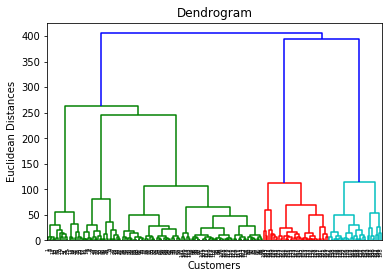

In [2]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In the dendogram above, the largest vertical segment that isn't crossed by any horizontal lines appears after the creation of 5 clusters. Because of this, there are 5 best-fit clusters.

<hr>

__Predicting Clustering Results:__

In [3]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y = hc.fit_predict(X);

<hr>

__Plotting Optimal Hierarchical Results:__

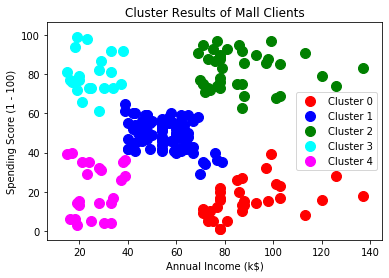

In [4]:
# Scatters the datapoints, color-coding them by their respective classification.
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range (0, 5):
    plt.scatter(X[y == (i), 0], X[y == (i), 1], s = 100, c = colors[i], label = f'Cluster {i}')

# Labeling the graph and adding the legend.
plt.title('Cluster Results of Mall Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()

plt.show()

<hr>

__Replotting Graph With More Accurate Labels:__

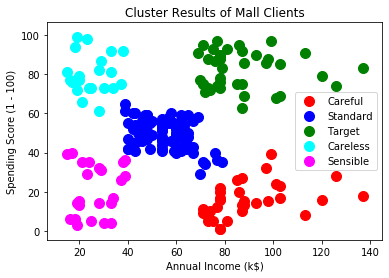

In [5]:
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']
for i in range (0, 5):
    plt.scatter(X[y == (i), 0], X[y == (i), 1], s = 100, c = colors[i], label = labels[i])
    
# Labeling the graph and adding the legend.
plt.title('Cluster Results of Mall Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
    
plt.show()